In [3]:
import pandas as pd
df = pd.read_csv("Titanic-Dataset.csv")

In [41]:
import numpy as np
import matplotlib.pyplot as plt;
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [115]:
df.shape

(891, 9)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# EDA - Exploratory Data Analysis

In [16]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

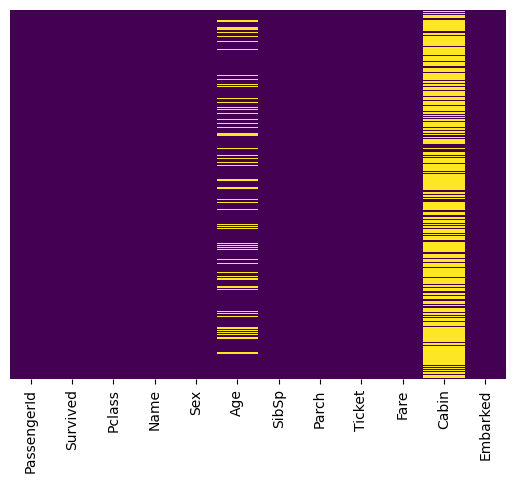

In [17]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [20]:
#to find percentage of missing value
percent_missing=df.isnull().sum()*100/len(df)
percent_missing

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

<Axes: xlabel='Survived', ylabel='count'>

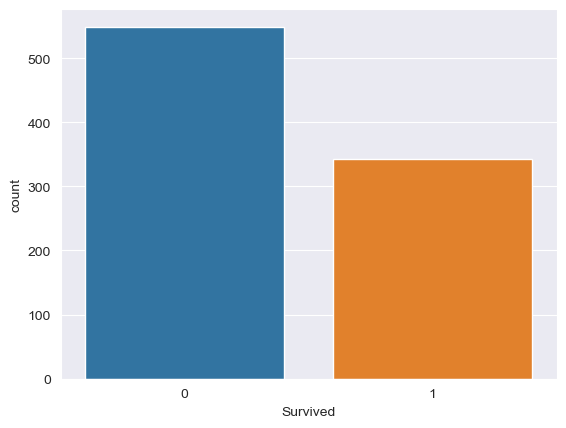

In [35]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',data=df)

<Axes: xlabel='Survived', ylabel='count'>

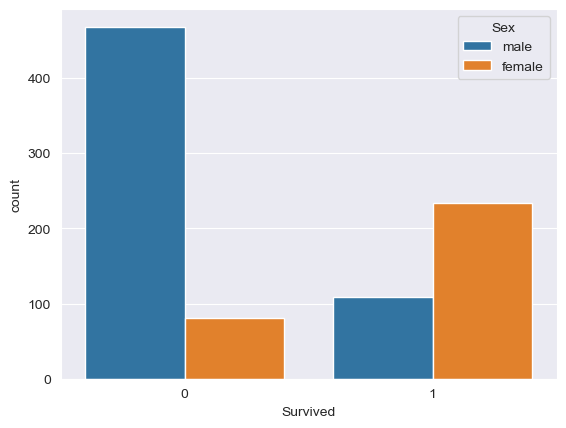

In [34]:
#male and female who survived
sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='Sex',data=df)
#In the below data female survived more than males

<Axes: xlabel='Survived', ylabel='count'>

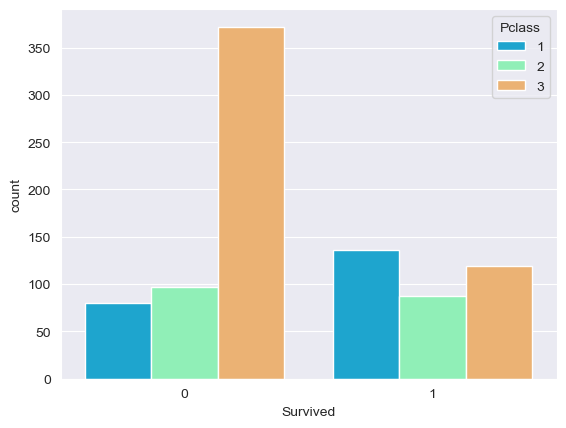

In [38]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

<Axes: xlabel='Age', ylabel='Density'>

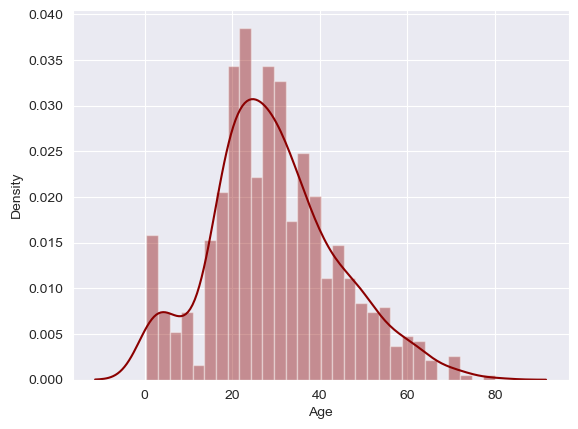

In [42]:
sns.distplot(df['Age'].dropna(),kde=True,color='darkred',bins=30)

<Axes: >

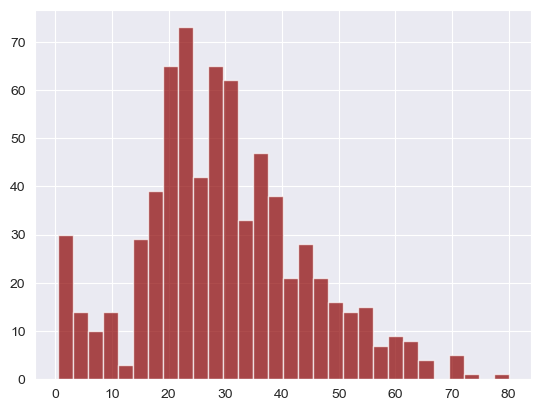

In [44]:
df['Age'].hist(bins=30,color='darkred',alpha=0.7)

<Axes: xlabel='SibSp', ylabel='count'>

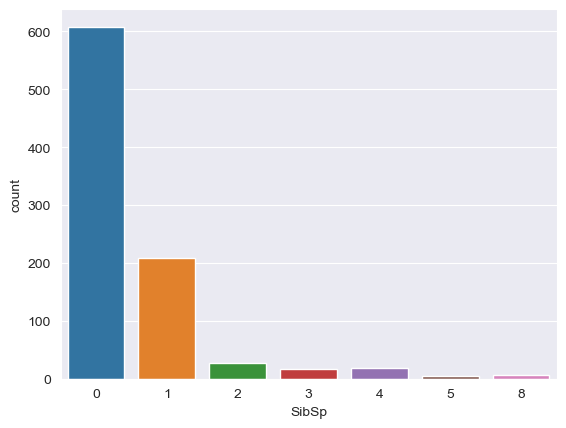

In [46]:
sns.countplot(x='SibSp',data=df)
#counting number of siblings

<Axes: xlabel='Parch', ylabel='count'>

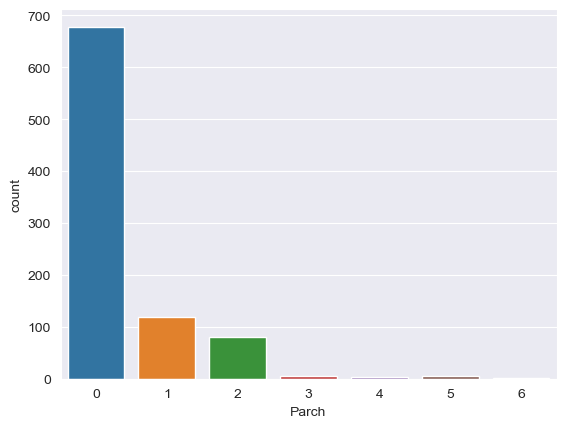

In [48]:
sns.countplot(x='Parch',data=df)

<Axes: >

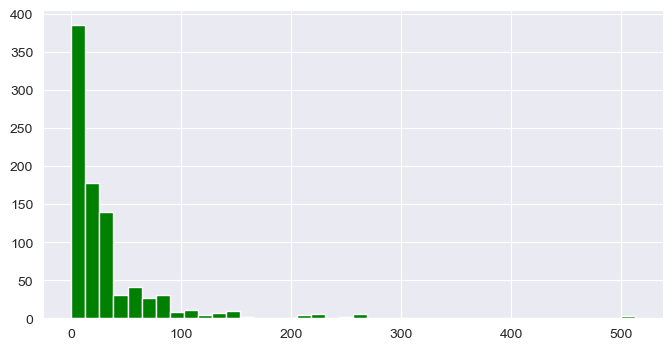

In [49]:
df['Fare'].hist(color='green',bins=40,figsize=(8,4))

# Data Cleaning

<Axes: xlabel='Pclass', ylabel='Age'>

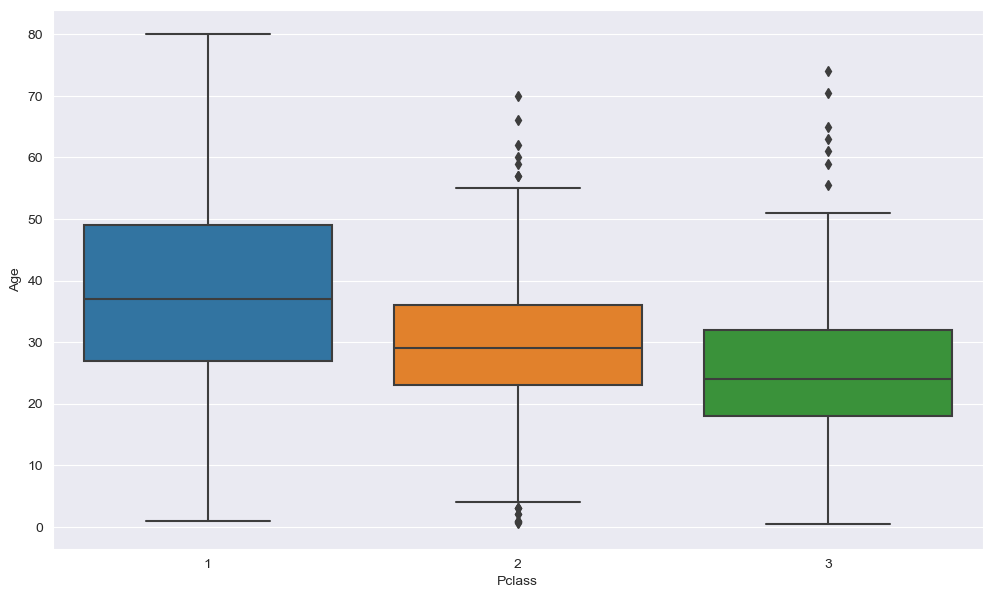

In [50]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='tab10')
#finding the missing age of every passenger class

In [51]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age
#as per the  passanger class we are returning the age of people

In [53]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
df['Embarked'] = df['Embarked'].fillna('S')

<Axes: >

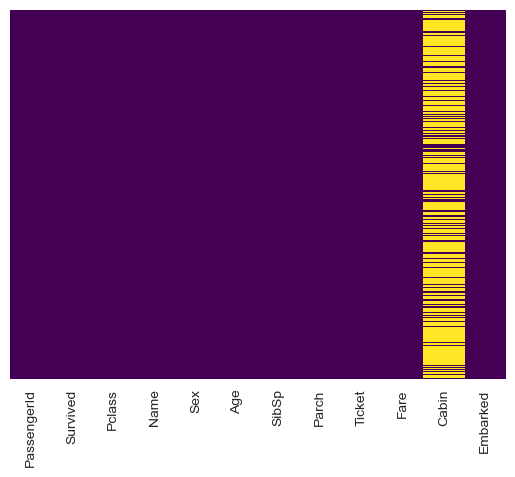

In [56]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#to confirm wheter the missing value are gone

In [58]:
df.drop('Cabin',axis=1,inplace=True)
#We drop Cabin since most of the value is missing

In [59]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Converting Categorical Feautures

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [64]:
df["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [63]:
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [73]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
sex.head()
#one hot encoding

,male
0,1
1,0
2,0
3,0
4,1


In [72]:
embark = pd.get_dummies(df['Embarked'],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [74]:
df.drop(['PassengerId','Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
#drop the columns not required

In [75]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [77]:
df = pd.concat([df,sex,embark],axis=1)
#we are concatenating the exsisting dataframe with sex and embark

In [78]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [81]:
df.shape

(891, 9)

# Machine Learning Models

In [82]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1), df['Survived'], test_size=0.30, random_state=76)

In [90]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
805,3,31.0,0,0,7.7750,1,0,1
653,3,24.0,0,0,7.8292,0,1,0
351,1,37.0,0,0,35.0000,1,0,1
658,2,23.0,0,0,13.0000,1,0,1
319,1,40.0,1,1,134.5000,0,0,0


In [93]:
X_train.shape

(623, 8)

In [94]:
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
262,1,52.0,1,1,79.65,1,0,1
151,1,22.0,1,0,66.60,0,0,1
59,3,11.0,5,2,46.90,1,0,1
857,1,51.0,0,0,26.55,1,0,1
633,1,37.0,0,0,0.00,1,0,1


In [95]:
X_test.shape

(268, 8)

# Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression

In [97]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [98]:
predictions = logmodel.predict(X_test)
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
262,1,52.0,1,1,79.65,1,0,1
151,1,22.0,1,0,66.60,0,0,1
59,3,11.0,5,2,46.90,1,0,1
857,1,51.0,0,0,26.55,1,0,1
633,1,37.0,0,0,0.00,1,0,1


In [99]:
predictions

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [100]:
from sklearn.metrics import classification_report,confusion_matrix

In [101]:
print(confusion_matrix(y_test,predictions))

[[151  14]
 [ 27  76]]


In [102]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       165
           1       0.84      0.74      0.79       103

    accuracy                           0.85       268
   macro avg       0.85      0.83      0.83       268
weighted avg       0.85      0.85      0.84       268



# Decision Tree Classifiction

In [103]:
from sklearn.tree import DecisionTreeClassifier

In [104]:
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [105]:
dt_pred = dt_model.predict(X_test)

In [106]:
print(confusion_matrix(y_test,dt_pred))

[[136  29]
 [ 30  73]]


In [107]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       165
           1       0.72      0.71      0.71       103

    accuracy                           0.78       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



# Random Forest Classification

In [121]:
from sklearn.ensemble import RandomForestClassifier

In [122]:
rf= RandomForestClassifier(n_estimators=500)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500)

In [123]:
rf_predict=rf.predict(X_test)

In [124]:
print(confusion_matrix(y_test,rf_predict))

[[147  18]
 [ 32  71]]


In [125]:
print(classification_report(y_test,rf_predict))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       165
           1       0.80      0.69      0.74       103

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268



# XGBoosts Classifier

In [116]:
from xgboost import XGBClassifier
xgboost = XGBClassifier(n_estimators=1000)
xgboost.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [117]:
xg_prediction= xgboost.predict(X_test)

In [118]:
print(confusion_matrix(y_test,xg_prediction))

[[145  20]
 [ 34  69]]


In [120]:
print(classification_report(y_test,xg_prediction))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       165
           1       0.78      0.67      0.72       103

    accuracy                           0.80       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.80      0.80      0.80       268



In [ ]:
#Different Model Gives Different Precision and f1-score.